## Problem Statement
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

We need to categorize the countries using some socio-economic and health factors that determine the overall development of the country. Then we need to suggest the countries which the CEO needs to focus on the most. And help them use this $ 10 million strategically and effectively.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scale
from sklearn.preprocessing import StandardScaler

# KMeans Clustering
from sklearn.cluster import KMeans

# Hierarchial Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# read the dataset
country_df = pd.read_csv("Country-data.csv")
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
#Check the shape
country_df.shape

(167, 10)

In [4]:
#Check numerical variables
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Cleaning Data

In [5]:
#Check for missing values
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
#Convert exports, imports and health column values from percentages to absolute values
country_df['exports'] = country_df['exports']*country_df['gdpp']/100
country_df['imports'] = country_df['imports']*country_df['gdpp']/100
country_df['health'] = country_df['health']*country_df['gdpp']/100
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## EDA

In [7]:
cols = list(country_df.columns)
cols

['country',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [8]:
cols = cols[1:]
cols

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

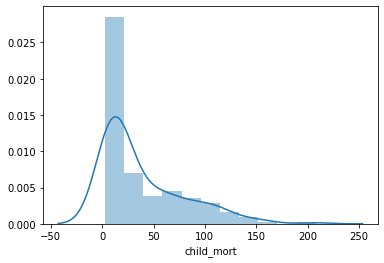

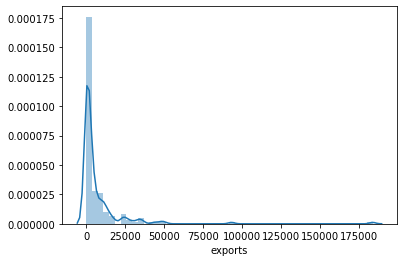

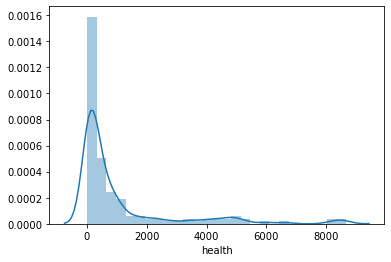

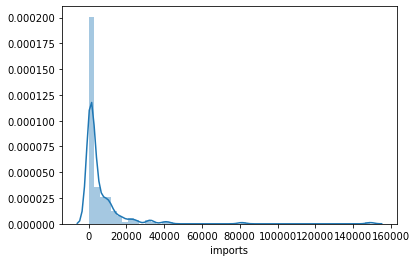

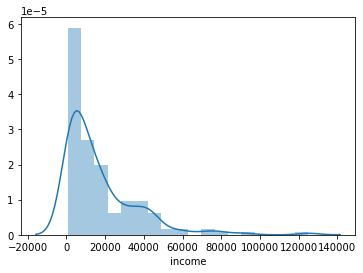

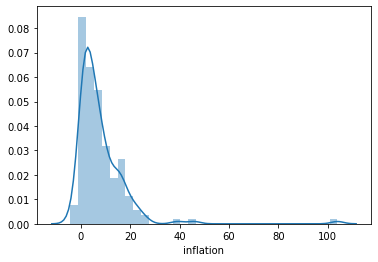

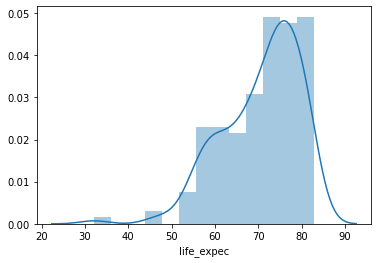

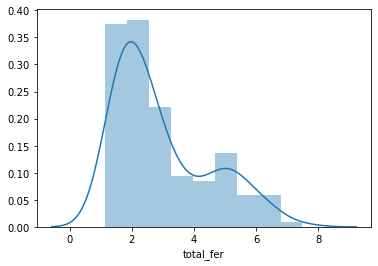

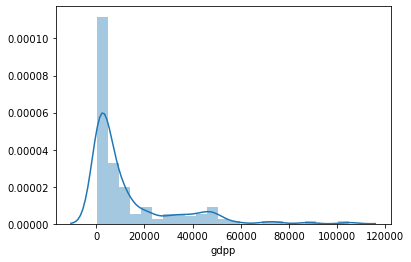

In [9]:
# distplot
for c in cols:
    sns.distplot(country_df[c])
    plt.show();

1. By seeing above distribution plot we can infer that there is no internal grouping in all the columns. 
2. However, if we look closely, than we'll see that income, life_expec and total_fer columns have a slight secondary bulge which may or may not have internal grouping. That we will see in further analysis.

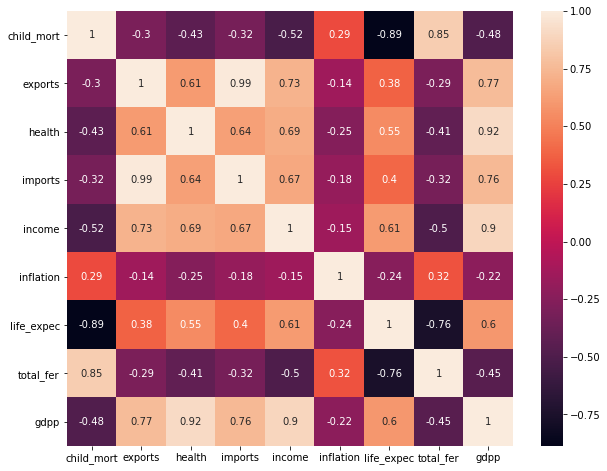

In [10]:
# heatmap
plt.figure(figsize=(10,8))
sns.heatmap(country_df[cols].corr(), annot=True);

From the above heatmap, we can see that following columns are highly correlated to each other:
- imports-exports
- gdpp-health
- life_expec-child_mort
- total_fer-child_mor

There are more columns correlated to each other but are less on scale:
- health-exports
- import-health
- income-exports
- income-health
- income-imports
- life_expec-income
- total_fer-life_expec

## Outliers

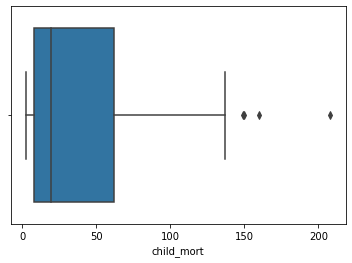

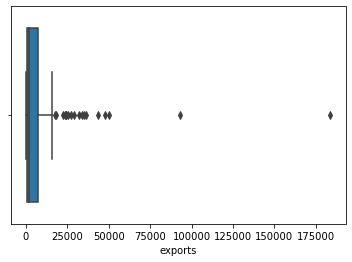

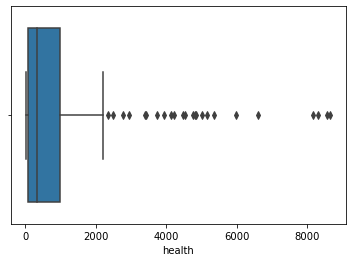

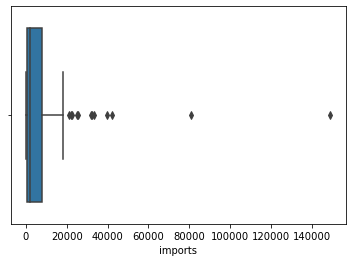

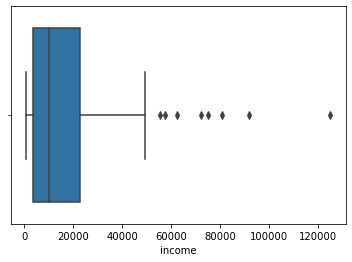

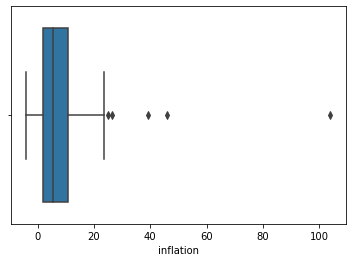

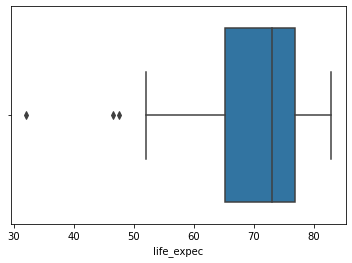

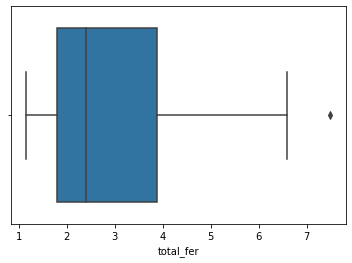

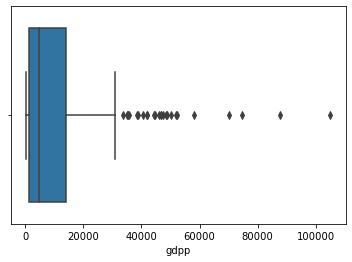

In [11]:
for c in cols:
    sns.boxplot(country_df[c])
    plt.show();

In [12]:
# Lets first deal with 'income' column outliers
q1 = country_df['income'].quantile(0.75)
q2 = country_df['income'].quantile(0.25)
upper_range = q1+1.5*(q1-q2)
upper_range

51967.5

In [13]:
# Drop all the those who has income more than '51967.5'
country_df = country_df[country_df['income'] < 51967.5]

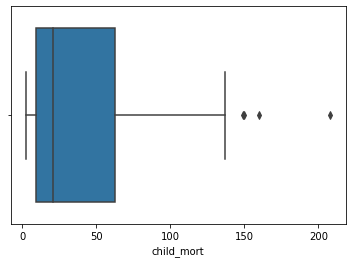

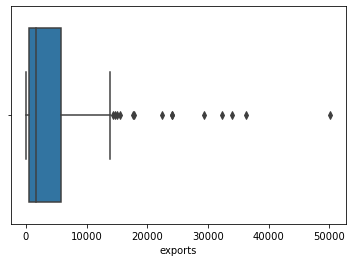

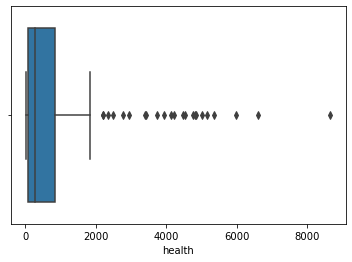

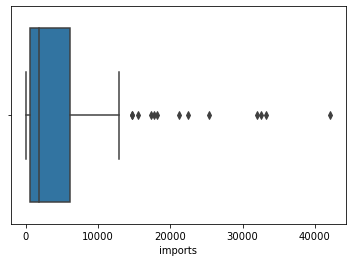

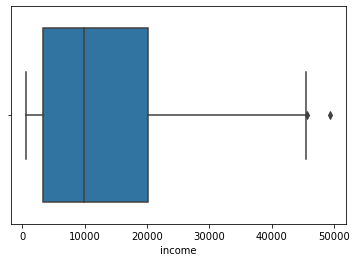

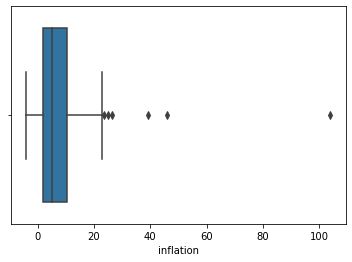

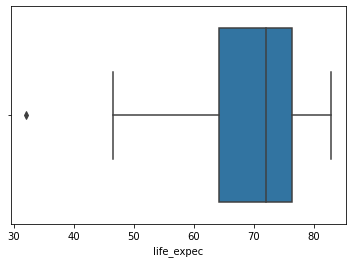

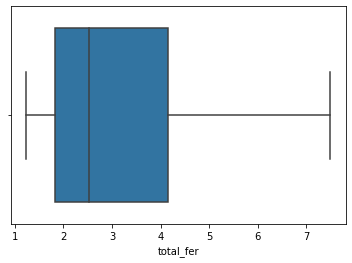

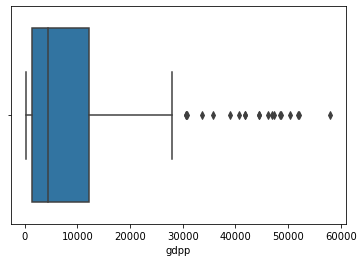

In [14]:
# Lets check again for outliers
for c in cols:
    sns.boxplot(country_df[c])
    plt.show();

Lets treat upper outliers of all the columns (except CHILD_MORT, INFLATION, TOTAL_FERTI as we need them for better analysis) with Soft Capping

In [15]:
exports = country_df['exports'].quantile(0.99)
country_df['exports'][country_df['exports']>=exports] = exports

health = country_df['health'].quantile(0.99)
country_df['health'][country_df['health']>=health] = health

imports = country_df['imports'].quantile(0.99)
country_df['imports'][country_df['imports']>=imports] = imports

gdpp = country_df['gdpp'].quantile(0.99)
country_df['gdpp'][country_df['gdpp']>=gdpp] = gdpp

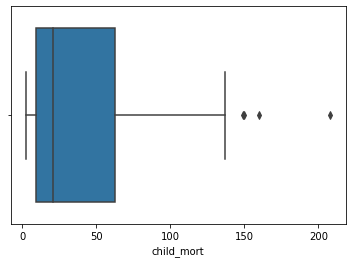

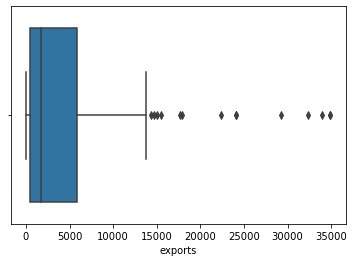

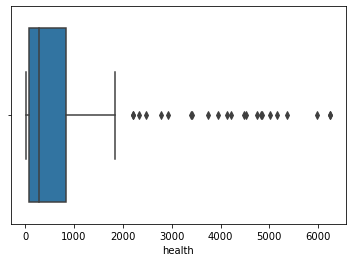

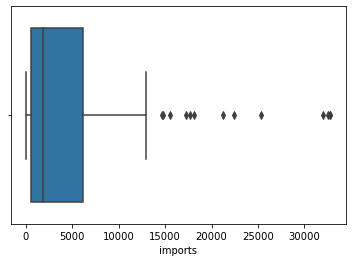

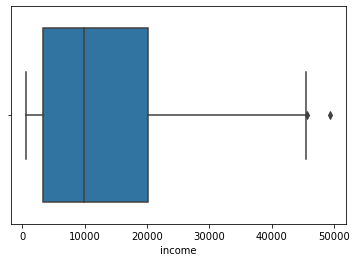

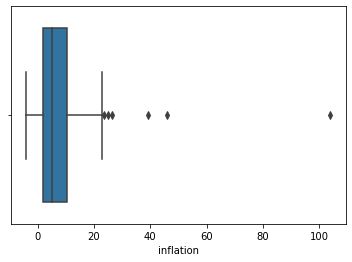

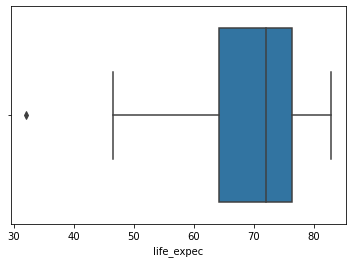

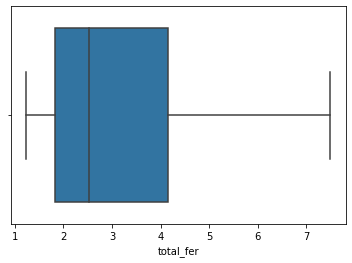

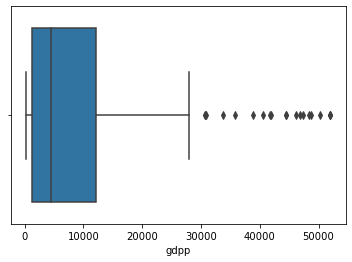

In [16]:
# Lets check again for outliers
for c in cols:
    sns.boxplot(country_df[c])
    plt.show();

## Check the cluster tendancy: Hopkin's Test

In [17]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [18]:
hopkins(country_df[cols])

0.9436206064571243

The hopkins values is above 85 percentage, hence we have a good data to work on.

## Scaling

In [19]:
ss = StandardScaler()
df1 = ss.fit_transform(country_df[cols])
df1

array([[ 1.2412812 , -0.64528496, -0.58376098, ..., -1.57475836,
         1.84878487, -0.71836273],
       [-0.57380697, -0.49290078, -0.42903021, ...,  0.70405995,
        -0.89159614, -0.4623221 ],
       [-0.30992866, -0.41356425, -0.48511745, ...,  0.72673476,
        -0.07671066, -0.4355381 ],
       ...,
       [-0.40857476, -0.52114337, -0.55110914, ...,  0.34126301,
        -0.69444643, -0.6635641 ],
       [ 0.40525554, -0.59806949, -0.565999  , ..., -0.29363165,
         1.0930443 , -0.6635641 ],
       [ 1.06618438, -0.57748875, -0.55358097, ..., -2.05092935,
         1.57277527, -0.65270572]])

In [20]:
df1 = pd.DataFrame(df1)
df1.columns = cols
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.241281,-0.645285,-0.583761,-0.657991,-0.950815,0.151624,-1.574758,1.848785,-0.718363
1,-0.573807,-0.492901,-0.429030,-0.396331,-0.317848,-0.309817,0.704060,-0.891596,-0.462322
2,-0.309929,-0.413564,-0.485117,-0.484677,-0.091898,0.772471,0.726735,-0.076711,-0.435538
3,1.951533,-0.345537,-0.543577,-0.467539,-0.624441,1.359759,-1.132600,2.072221,-0.502860
4,-0.729175,0.123095,-0.108743,0.385600,0.379784,-0.594139,0.760747,-0.576157,0.124754


## Find the best value of k: SSD, Silhouette Score

In [21]:
# Silhouette Score
from sklearn.metrics import silhouette_score

ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(df1)
    ss.append([k, silhouette_score(df1, kmean.labels_)])
ss

[[2, 0.49656607964007315],
 [3, 0.42716580814288907],
 [4, 0.40621999368275796],
 [5, 0.4207233001744969],
 [6, 0.311014002286579],
 [7, 0.297435268435039],
 [8, 0.3134586050458802],
 [9, 0.2512850629006602],
 [10, 0.2595405012109838]]

In [22]:
sil = pd.DataFrame(ss)
sil

,0,1
0,2,0.496566
1,3,0.427166
2,4,0.406220
3,5,0.420723
4,6,0.311014
5,7,0.297435
6,8,0.313459
7,9,0.251285
8,10,0.259541


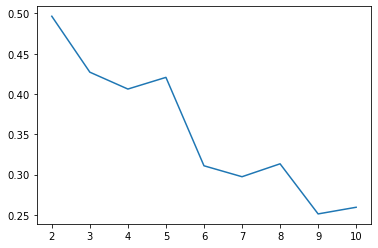

In [23]:
plt.plot(sil[0], sil[1]);

In [24]:
# SSD: Elbow curve
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(df1)
    ssd.append([k, kmean.inertia_])
ssd

[[2, 774.7838428973043],
 [3, 497.83900589209253],
 [4, 410.73882822103275],
 [5, 334.2607514132277],
 [6, 286.1956145308656],
 [7, 248.84758840042497],
 [8, 220.56146901410824],
 [9, 202.67456664306286],
 [10, 189.28738828702512]]

In [25]:
ssd = pd.DataFrame(ssd)
ssd

,0,1
0,2,774.783843
1,3,497.839006
2,4,410.738828
3,5,334.260751
4,6,286.195615
5,7,248.847588
6,8,220.561469
7,9,202.674567
8,10,189.287388


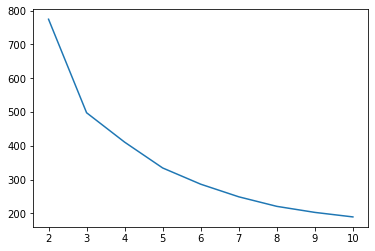

In [26]:
plt.plot(ssd[0],ssd[1]);

### From above two graphs, we can say that K=3 is a good choice.

In [27]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df1)

KMeans(n_clusters=3, random_state=0)

In [28]:
# Lets check the Centroids
kmeans.cluster_centers_

array([[-4.19425830e-01, -2.65918839e-01, -3.40287888e-01,
        -2.62417330e-01, -1.36210559e-01, -2.38751532e-04,
         2.69237143e-01, -4.46965557e-01, -3.03873196e-01],
       [-8.62772001e-01,  1.62122238e+00,  1.85438451e+00,
         1.67742026e+00,  1.67362952e+00, -6.04453916e-01,
         1.12315298e+00, -8.26559400e-01,  1.88398188e+00],
       [ 1.34825741e+00, -5.42496613e-01, -5.52281788e-01,
        -5.85326988e-01, -8.21274636e-01,  3.89987943e-01,
        -1.23236874e+00,  1.37693989e+00, -6.40138954e-01]])

In [29]:
# Lets print the labels
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1, 1,
       0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0,
       0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 0,
       1, 1, 0, 0, 2, 0, 1, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0,
       0, 0, 0, 2, 2])

In [30]:
# Lets assign labels to our original dataframe
country_df['labels'] = kmeans.labels_
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [31]:
country_df['labels'].value_counts()

0    85
2    45
1    29
Name: labels, dtype: int64

## Visualize the cluster using a scatter plots

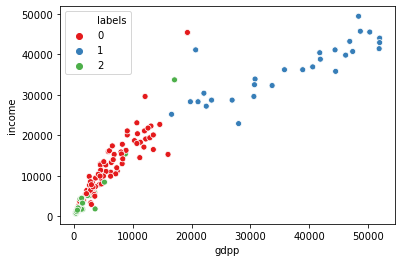

In [32]:
sns.scatterplot(x='gdpp', y='income', hue='labels', data=country_df, palette='Set1');

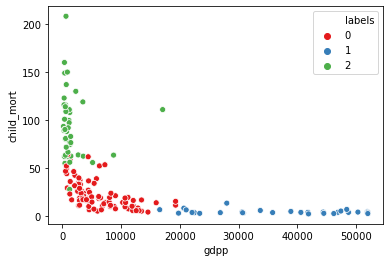

In [33]:
sns.scatterplot(x='gdpp', y='child_mort', hue='labels', data=country_df, palette='Set1');

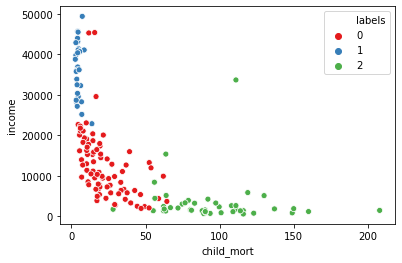

In [34]:
sns.scatterplot(x='child_mort', y='income', hue='labels', data=country_df, palette='Set1');

## Cluster Profiling

In [35]:
country_df[['child_mort','income', 'gdpp','labels']].groupby('labels').mean()

,child_mort,income,gdpp
labels,,,
0,22.860000,12317.529412,6278.847059
1,4.882759,36106.896552,36502.344828
2,94.537778,3312.733333,1633.600000


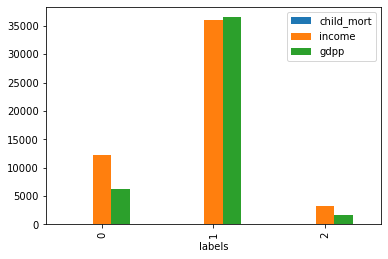

In [36]:
country_df[['child_mort','income', 'gdpp','labels']].groupby('labels').mean().plot(kind='bar');

Child_mort data is too low to be visible in graph for main dataframe, lets try this for scaled dataframe.

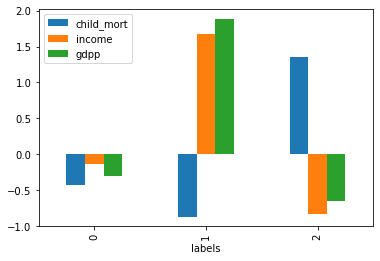

In [37]:
df1['labels'] = kmeans.labels_
df1[['child_mort','income', 'gdpp','labels']].groupby('labels').mean().plot(kind='bar');

This plot of scaled dataframe clearifies things better.

### Identifying the countries for the cluster 2 as it have low income, low gdpp and high child mortality rate

In [38]:
c1 = country_df[country_df['labels']==2]
c1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,2
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530,2
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,2
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,2
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,2
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897,2
36,Comoros,88.2,126.8850,34.6819,397.573,1410,3.870,65.9,4.75,769,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334,2


In [39]:
c1.sort_values(by=['gdpp','income','child_mort'], ascending=[True, True, False]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,2


## Hierarchical Clustering

In [40]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,1.241281,-0.645285,-0.583761,-0.657991,-0.950815,0.151624,-1.574758,1.848785,-0.718363,2
1,-0.573807,-0.492901,-0.429030,-0.396331,-0.317848,-0.309817,0.704060,-0.891596,-0.462322,0
2,-0.309929,-0.413564,-0.485117,-0.484677,-0.091898,0.772471,0.726735,-0.076711,-0.435538,0
3,1.951533,-0.345537,-0.543577,-0.467539,-0.624441,1.359759,-1.132600,2.072221,-0.502860,2
4,-0.729175,0.123095,-0.108743,0.385600,0.379784,-0.594139,0.760747,-0.576157,0.124754,0


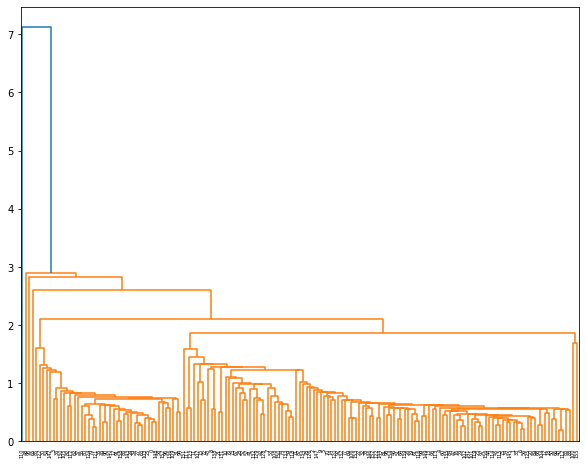

In [41]:
# single linkage
plt.figure(figsize=(10,8))
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

Above dendogram suggests to cut at 3 where we will get 2 clusters. Lets check it with complete linkage.

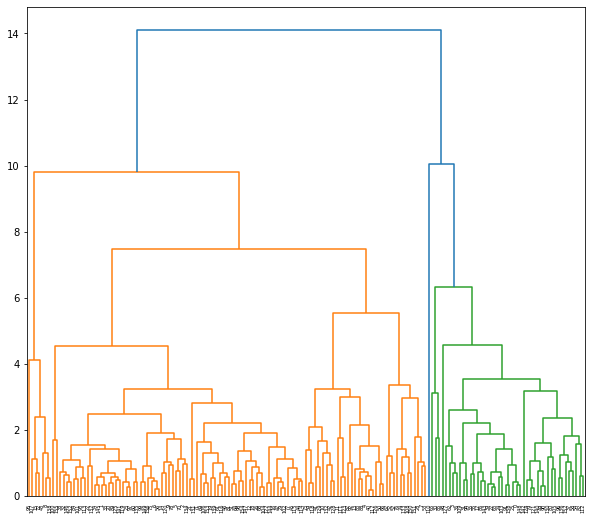

In [42]:
# complete linkage
plt.figure(figsize=(10,9))
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

The complete linkage dendogram suggests us that we need to cut at 10 and we will get 3 clusters.

In [43]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0])

In [44]:
# assign cluster labels
country_df['cluster_labels'] = cluster_labels
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,1


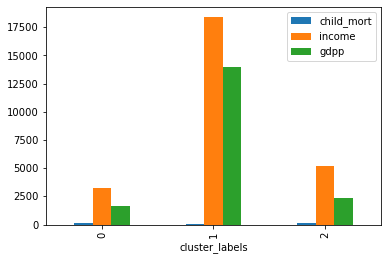

In [45]:
country_df[['child_mort','income', 'gdpp','cluster_labels']].groupby('cluster_labels').mean().plot(kind='bar');

Child_mort data is too low to be visible in graph for main dataframe, lets try this for scaled dataframe.

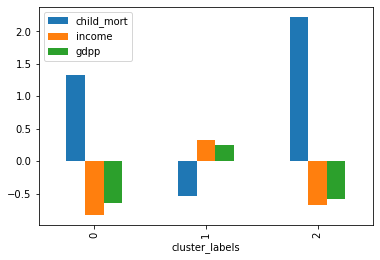

In [46]:
df1['cluster_labels'] = cluster_labels
df1[['child_mort','income', 'gdpp','cluster_labels']].groupby('cluster_labels').mean().plot(kind='bar');

The above graph shows that cluster 2 has highest child mortality rate with low income and low gdpp. Lets find out countries in that cluster.

In [47]:
c2 = country_df[country_df['cluster_labels']==2]
c2.sort_values(by=['gdpp','income','child_mort'], ascending=[True, True, False]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,cluster_labels
113,Nigeria,130.0,589.49,118.131,405.42,5150,104.0,60.5,5.84,2330,2,2


Cluster 2 has only one country in it. So, lets check cluster 1.

In [48]:
c2 = country_df[country_df['cluster_labels']==1]
c2.sort_values(by=['gdpp','income','child_mort'], ascending=[True, True, False]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,cluster_labels
109,Nepal,47.0,56.7136,31.0800,215.488,1990,15.10,68.3,2.61,592,0,1
146,Tajikistan,52.4,109.9620,44.1324,432.468,2110,12.50,69.6,3.51,738,0,1
12,Bangladesh,49.4,121.2800,26.6816,165.244,2440,7.14,70.4,2.33,758,0,1
27,Cambodia,44.4,425.2260,44.6448,467.670,2520,3.12,66.1,2.88,786,0,1
83,Kyrgyz Republic,29.6,454.0800,54.3840,718.960,2790,10.00,68.5,3.10,880,0,1
